<a href="https://colab.research.google.com/github/yasntrk/zipflaw/blob/main/zipflaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <font size = 6 ><center><p>**-HAZIRLAYANLAR-**</p></center>

---

                                      Yasin TÜRK

                                    Berkay MAYALI

                                   Munzur ÇETİNKAYA

<font size = 10 > Motivasyon 



![alt text](https://3.bp.blogspot.com/-PN8sHsPtuww/WhstBcLY7vI/AAAAAAAAACk/Dnz7i6b95jIC--pqEsGEumcCSQIRPW6MgCLcBGAs/s1600/55.PNG) 
>Zipf Yasası ilk olarak Fransız stenograf Jean-Baptiste Estoup tarafından sunuldu ve daha sonra Amerikan dilbilimci George Kingsley Zipf'in adını aldı. Zipf Yasası her zaman az sayıda kelimenin kullanıldığını, büyük çoğunluğun ise nadiren kullanıldığını belirtmektedir. Bu konuda şaşırtıcı bir şey yok, biliyoruz ki bazı kelimeleri çok sık kullandık, örneğin “the”, “of” vb. Ve nadiren “aardvark” gibi kelimeleri kullanıyoruz (aardvark Afrika'ya özgü bir hayvan türüdür ). Ancak ilginç olan, “bazı doğal dil ifadeleri göz önüne alındığında, herhangi bir kelimenin sıklığı, frekans tablosundaki sıralaması ile ters orantılıdır. Böylece, en sık kullanılan kelime en sık kullanılan ikinci sözcüğün yaklaşık iki katı, en sık kullanılan üçüncü sözcüğün üç katıdır. ” 

Zipf Kanunu gerçekten işliyor mu? Farklı veriler ile analizinin yapılması.




<font size = 10 > Kaynaklar ve Veriler

Kitaplar = https://www.gutenberg.org/

Nüfus Verileri = https://raw.githubusercontent.com/yasntrk/climatechange/blob/master/ilnufusu.csv

Twitter Verileri = https://raw.githubusercontent.com/yasntrk/climatechange/master/bir.xlsx

<font size = 10 > Zipf Yasası'nın Doğruluğunun İspatı ve Twitter'dan Çekilen Verinin Kullanımı



Zipf Kanunu Nedir? <br>
<br>
Zipf kanunu, 1930’lu yıllarda Amerika’da Harvard Üniversitesi’nde dilbilim profesörü olan George Kingsley Zipf, tarafından geliştirilmiştir. Bu yüzden onun adı ile anılan yasa, istatistiki bir durumun deneysel keşfine dayanmaktadır.<br>
<br>

Hangi dilde olursa olsun herhangi bir metinde geçen sözcükler, kullanılma sıklığına göre sıralandığında oluşan listede her zaman geçerli bir kural vardır. Sıralama listesindeki sözcüklerin sıra numarası ile o sözcüğün sıklık sayısı sabit bir sayıdır. Bu kuralı formülle ifade edecek olursak; N sırasında yer alan sözcük, o metinde 1/N defa tekrarlanmıştır. Yani bu; listenin birinci sırasındaki sözcük, ikinci sıradaki sözcükten 2, üçüncü sıradaki sözcükten 3 kat daha fazla kullanılmış olduğu anlamına gelir.



Zipf Kanunu Nedir?
Zipf kanunu, 1930’lu yıllarda Amerika’da Harvard Üniversitesi’nde dilbilim profesörü olan George Kingsley Zipf, tarafından geliştirilmiştir. Bu yüzden onun adı ile anılan yasa, istatistiki bir durumun deneysel keşfine dayanmaktadır.


George Kingsley Zipf
Basit Tarif
Hangi dilde olursa olsun herhangi bir metinde geçen sözcükler, kullanılma sıklığına göre sıralandığında oluşan listede her zaman geçerli bir kural vardır. Sıralama listesindeki sözcüklerin sıra numarası ile o sözcüğün sıklık sayısı sabit bir sayıdır. Bu kuralı formülle ifade edecek olursak; N sırasında yer alan sözcük, o metinde 1/N defa tekrarlanmıştır. Yani bu; listenin birinci sırasındaki sözcük, ikinci sıradaki sözcükten 2, üçüncü sıradaki sözcükten 3 kat daha fazla kullanılmış olduğu anlamına gelir.



Klasik Örnek
Diyelim ki sadece 10 sözcükten oluşan bir dil var ve bu dille kaleme alınmış metinde en sık kullanılan sözcük 100 defa kullanılmış. Bu durumda en sık kullanılan kelimeden en az kullanılan kelimeye göre yapılan sıralama listesi şöyle olacaktır:

1. sözcük => 100/1 = 100
2. sözcük => 100/2 = 50
3. sözcük => 100/3 = 33,3
4. sözcük => 100/4 = 25
5. sözcük => 100/5 = 20
6. sözcük => 100/6 = 16,6
7. sözcük => 100/7 = 14,3
8. sözcük => 100/8 = 12,5
9. sözcük => 100/9 = 11,1
10. sözcük => 100/10= 10

Profesör Zipf, James Joyce’un Ulysses adlı romanını incelediğinde yasanın geçerli olduğunu keşfetmiştir. Araştırmaya göre sıralama listesindeki

Birinci sözcük 8.000,
Onuncu sözcük 800,
Yüzüncü sözcük 80,
Bininci sözcük 8 defa kullanılmıştır.

Biz de bugün bunun ispatını yapmaya çalışıyor olacağız 



#Gerekli Kütüphanelerin Eklenmesi




In [ ]:
import urllib
import collections
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Zipf Yasası şu şekilde yazılabilir: en sık kullanılan kelime f (r) frekansına göre ölçeklenir.
![alt text](https://miro.medium.com/max/992/1*rBRq-Wn1YRJqUU4O9MRdFQ.png)

In [ ]:
#gerekli fonsiyonların yazılması.
def zipf_tablo_olustur(metin, kelime_sayisi):
  """
  Verilen satir sayisi kadar verileri içeren,
  en sık kullanılan kelimeler, sıklıkları ve
  diğer verileri bulunduran 
  sözlüklerin bir listesini oluşturur.
  """

  metin = metni_temizle(metin)
  metin = metin.lower()
  _kelime_tekrar_sayilari = kelime_tekrar_sayilari(metin, kelime_sayisi)
  zipf_tablosu = tablo_olustur(_kelime_tekrar_sayilari)
  
  return zipf_tablosu


def metni_temizle(metin):
  """
  Verilen metin içerisindeki işaret, noktalama işaretleri
  ve sayıları temizler.
  """

  silinecekler = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789"
  temiz_metin = str.maketrans("", "", silinecekler)

  return metin.translate(temiz_metin)


def kelime_tekrar_sayilari(metin, kelime_sayisi):
  """
  Sık kullanılan kelimeden en aza doğru sıralama yapar.
  Counter objesi şeklinde liste döndürür.
  """

  kelimeler = metin.split()#boşluklardan ayıkla.
  kelime_tekrarlari = collections.Counter(kelimeler)#kelime listesi için bir koleksiyon oluşturma.
  kelime_frekansları = kelime_tekrarlari.most_common(kelime_sayisi)#en çok kullanılan kelimeleri istenen sayida tut.

  return kelime_frekansları


def tablo_olustur(kelime_frekansları):
  """
  kelime_tekrar_sayilarinin bulunduğu objeyi alır
  ve sözlüklerden oluşan verilerin bulunduğu
  bir şekilde liste olarak geri döndürür.
  """

  zipf_tablosu = []
  frekans = kelime_frekansları[0][1]

  for index, item in enumerate(kelime_frekansları, start=1):
    yasaya_gore_frekans = "1/{}".format(index)
    zipf_frekansı = frekans * (1 / index)
    fark = item[1] - zipf_frekansı
    yuzde_fark = (item[1] / zipf_frekansı) * 100
    zipf_tablosu.append({"kelime": item[0],
                        "tekrar_sayisi": item[1],
                        "yasaya_gore_frekans": yasaya_gore_frekans,
                        "zipf_frekansı": zipf_frekansı,
                        "fark": fark,
                        "yuzde_fark": yuzde_fark})

  return zipf_tablosu

In [ ]:
#roman okuma
url = 'http://www.gutenberg.org/cache/epub/730/pg730.txt'
f = urllib.request.urlopen(url)
text = str(f.read(),('utf-8'))

kelime_sayisi = 10
zipf_tablosu = zipf_tablo_olustur(text, kelime_sayisi)
df = pd.DataFrame(zipf_tablosu)
df

,kelime,tekrar_sayisi,yasaya_gore_frekans,zipf_frekansı,fark,yuzde_fark
0,the,9770,1/1,9770.000000,0.000000,100.000000
1,and,5425,1/2,4885.000000,540.000000,111.054248
2,of,3981,1/3,3256.666667,724.333333,122.241556
3,to,3948,1/4,2442.500000,1505.500000,161.637666
4,a,3785,1/5,1954.000000,1831.000000,193.705220
5,in,2430,1/6,1628.333333,801.666667,149.232344
6,he,2397,1/7,1395.714286,1001.285714,171.740020
7,his,2356,1/8,1221.250000,1134.750000,192.917093
8,that,1846,1/9,1085.555556,760.444444,170.051177
9,was,1787,1/10,977.000000,810.000000,182.906858


#Veri Görselleştirme

> Indented block



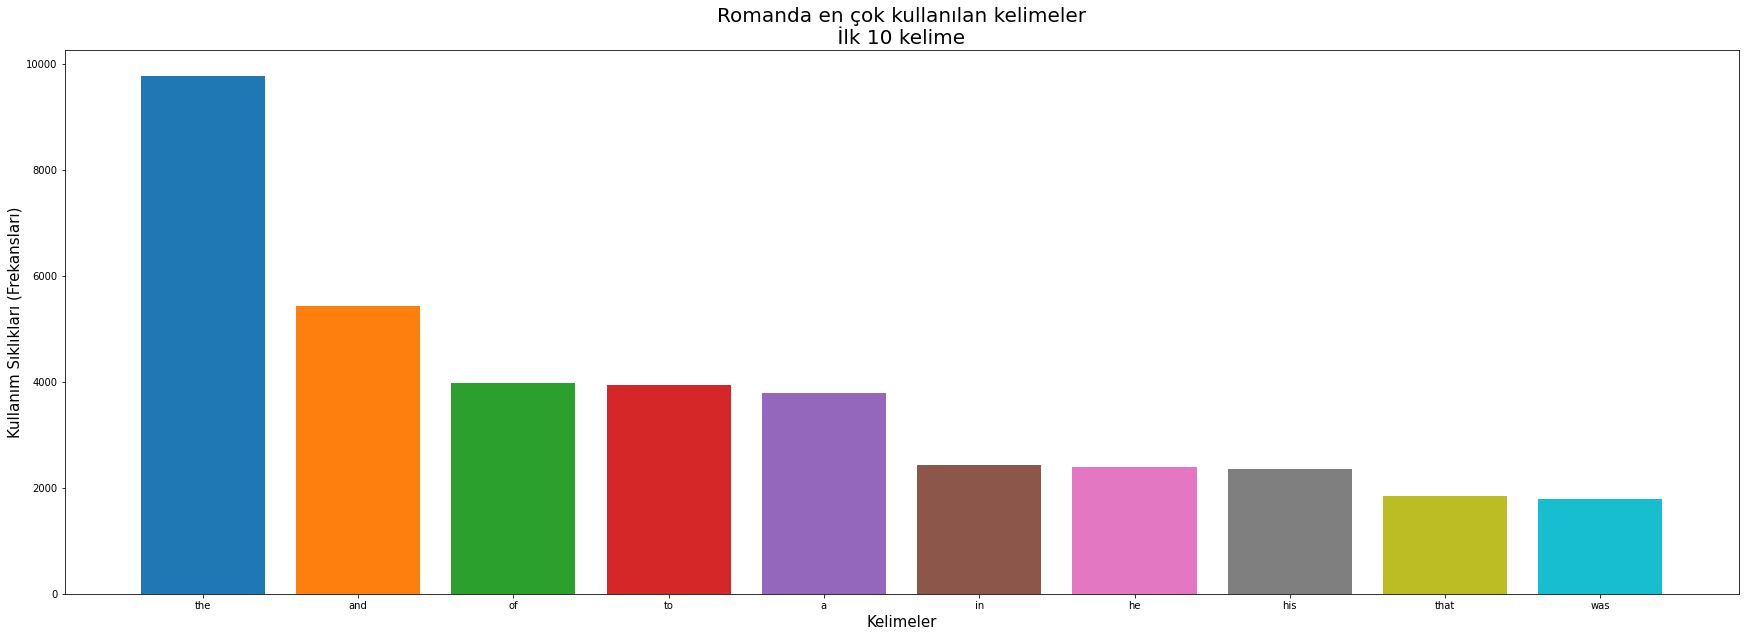

In [ ]:
"""
tablo---->
item["kelime"]
item["tekrar_sayisi"]
item["yasaya_gore_frekans"]
item["zipf_frekansı"]
item["fark"]
item["yuzde_fark"]
"""

plt.figure(figsize=(30,10))
for index, item in enumerate(zipf_tablosu, start=1):
  plt.bar(item["kelime"],item["tekrar_sayisi"])
plt.title("Romanda en çok kullanılan kelimeler\n" + " İlk " + str(kelime_sayisi) + " kelime ", fontsize = 20)
plt.xlabel('Kelimeler', fontsize=15)
plt.ylabel('Kullanım Sıklıkları (Frekansları)', fontsize=15)
plt.rc(['xtick','ytick'], labelsize=14)

<center><h2>Seçtiğimiz Romanda en çok kullanılan kelimelere baktığımızda Nipf genel olarak Zipf kuralına uymaktadır. "The" kelimesinin yaklaşık 1/2'si kadar "and" kelimesi vardır ve bu oran giderek düşmektedir <h2/><center/>

In [ ]:
kelime_sayisi = 10000
zipf_tablosu = zipf_tablo_olustur(text, kelime_sayisi)
df = pd.DataFrame(zipf_tablosu)
df

,kelime,tekrar_sayisi,yasaya_gore_frekans,zipf_frekansı,fark,yuzde_fark
0,the,9770,1/1,9770.000000,0.000000,100.000000
1,and,5425,1/2,4885.000000,540.000000,111.054248
2,of,3981,1/3,3256.666667,724.333333,122.241556
3,to,3948,1/4,2442.500000,1505.500000,161.637666
4,a,3785,1/5,1954.000000,1831.000000,193.705220
...,...,...,...,...,...,...
9995,sallying,1,1/9996,0.977391,0.022609,102.313204
9996,restrained,1,1/9997,0.977293,0.022707,102.323439
9997,dissuade,1,1/9998,0.977195,0.022805,102.333675
9998,hotbrained,1,1/9999,0.977098,0.022902,102.343910


<center> <h2>                                                                              Az Sonra göreceğiniz Zipf eğim grafikleri, Verilen dil, metin ya da herhangi bir yazının Zipf oranlarına uygun olup olmadığını göstermektedir. 

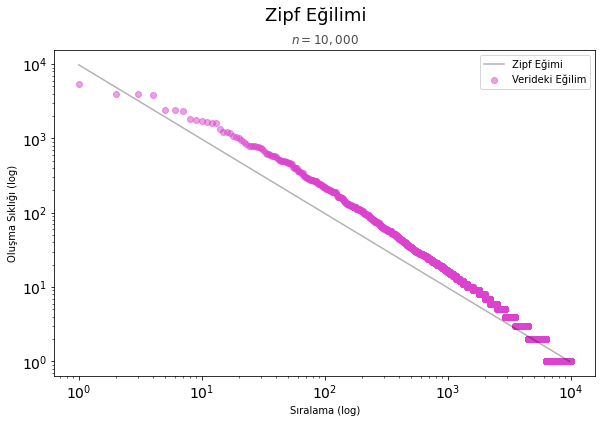

In [ ]:
fr = df['tekrar_sayisi']
indisler = np.argsort(-df['tekrar_sayisi'])
frekanslar = fr[indisler]
"""
x_ekseni = np.arange(1,len(frekanslar))
alpha = (-np.log(6) / np.log(5))
y_ekseni = (1 / sum(x_ekseni**alpha)) * x_ekseni**alpha
"""

plt.figure(figsize=(9.7, 6))
plt.scatter(indisler, frekanslar, alpha=.5, label='Verideki Eğilim', color="#db43ce")
plt.plot([1,frekanslar[0]], [frekanslar[0],1], color='black', alpha=.3, label="Zipf Eğimi")
#plt.plot(x_ekseni, y_ekseni, color='black', alpha=.3, label="Zipf Eğimi")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sıralama (log)")
plt.ylabel('Oluşma Sıklığı (log)')
plt.suptitle("Zipf Eğilimi", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

<center><h2>
N=10 için Zipf Olasılık kütle fonksiyonu log–log ıskalası üzerindedir. Yatay eksen k endeksidir. (Fonksiyonun k nin sadece tam sayı değerleri ile tanımlandığına dikkat etmek gerekmektedir.)
Grafikten görüleceği üzere Zipf yasası gereği belirtilen Zipf eğimine yakın bir değerde eğim çıkmıştır. Aynı zamanda bir kelimenin sıklığı ile kelimenin sırası arasındaki ilişkiye bakılmıştır.<h2/><center/>

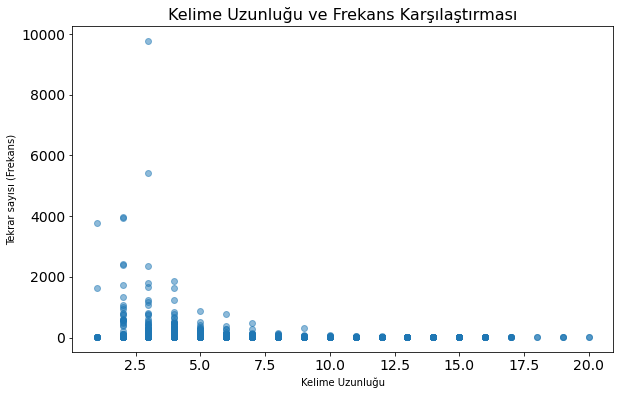

In [ ]:
uzunluklar = [len(k) for k in df['kelime']]
plt.figure(figsize=(9.7, 6))
plt.scatter(uzunluklar, frekanslar, alpha=.5)
plt.xlabel('Kelime Uzunluğu')
plt.ylabel('Tekrar sayısı (Frekans)')
plt.title('Kelime Uzunluğu ve Frekans Karşılaştırması', fontsize=16)
plt.show()

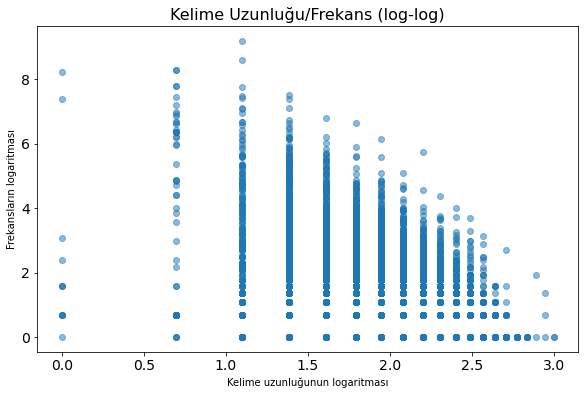

In [ ]:
log_degerler = np.log(frekanslar)
plt.figure(figsize=(9.7, 6))
log_uzunluklar = np.log(np.array(uzunluklar))
plt.scatter(log_uzunluklar, log_degerler, alpha=.5)
plt.xlabel('Kelime uzunluğunun logaritması')
plt.ylabel('Frekansların logaritması')
plt.title('Kelime Uzunluğu/Frekans (log-log)', fontsize=16)
plt.show()

<center><h2><br> Kitapta en çok geçen kelimelere baktığımızda of-to bağlaçları dışında zipf kanununa uyuyor. 1.Kelime 2.'nin 2 katı, 3. Kelimenin ise yaklaşık 4 katı. Yine burada of ve to yakınlığı var. Geri kalan durumlar birbiriyle tutarlı <br/><h2><center/>

Peki Zipf Yasası farklı diller içinde geçerli mi?
Hadi farklı bazı diller için analiz yapalım.

**FARKLI DİLLERDE ZIPF EĞİLİMLERİ**

In [ ]:
def url_oku(url):
  """
  İçerisine gönderilen str url'i okur ve dataframe objesi
  olarak geri döndürür. 
  """
  f = urllib.request.urlopen(url)
  text = str(f.read(),('utf-8'))
  tablo = zipf_tablo_olustur(text, 10000)
  df = pd.DataFrame(tablo)
  
  return df

In [ ]:
df_ispanyolca = url_oku('https://www.gutenberg.org/files/58221/58221-0.txt')
df_ingilizce = url_oku('http://www.gutenberg.org/files/4300/4300-0.txt')
df_almanca = url_oku('https://www.gutenberg.org/files/54597/54597-0.txt')
df_fransizca = url_oku('http://www.gutenberg.org/cache/epub/18716/pg18716.txt')

In [ ]:
df_ispanyolca

,kelime,tekrar_sayisi,yasaya_gore_frekans,zipf_frekansı,fark,yuzde_fark
0,de,8235,1/1,8235.000000,0.000000,100.000000
1,y,7513,1/2,4117.500000,3395.500000,182.465088
2,á,7033,1/3,2745.000000,4288.000000,256.211293
3,que,5621,1/4,2058.750000,3562.250000,273.029751
4,la,5135,1/5,1647.000000,3488.000000,311.778992
...,...,...,...,...,...,...
9995,metióse,1,1/9996,0.823830,0.176170,121.384335
9996,acebuche,1,1/9997,0.823747,0.176253,121.396478
9997,entrelazados,1,1/9998,0.823665,0.176335,121.408622
9998,bastaran,1,1/9999,0.823582,0.176418,121.420765


In [ ]:
df_ingilizce

,kelime,tekrar_sayisi,yasaya_gore_frekans,zipf_frekansı,fark,yuzde_fark
0,the,15018,1/1,15018.000000,0.000000,100.000000
1,of,8254,1/2,7509.000000,745.000000,109.921428
2,and,7217,1/3,5006.000000,2211.000000,144.167000
3,a,6518,1/4,3754.500000,2763.500000,173.605007
4,to,5030,1/5,3003.600000,2026.400000,167.465708
...,...,...,...,...,...,...
9995,bosses,2,1/9996,1.502401,0.497599,133.120256
9996,betide,2,1/9997,1.502251,0.497749,133.133573
9997,clover,2,1/9998,1.502100,0.497900,133.146890
9998,pup,2,1/9999,1.501950,0.498050,133.160208


In [ ]:
df_almanca

,kelime,tekrar_sayisi,yasaya_gore_frekans,zipf_frekansı,fark,yuzde_fark
0,und,3428,1/1,3428.000000,0.000000,100.000000
1,der,2843,1/2,1714.000000,1129.000000,165.869312
2,die,2557,1/3,1142.666667,1414.333333,223.774796
3,ich,1949,1/4,857.000000,1092.000000,227.421237
4,in,1610,1/5,685.600000,924.400000,234.830805
...,...,...,...,...,...,...
9995,gewannen,1,1/9996,0.342937,0.657063,291.598600
9996,tröstliche,1,1/9997,0.342903,0.657097,291.627771
9997,durchwegs,1,1/9998,0.342869,0.657131,291.656943
9998,unbeschädigt,1,1/9999,0.342834,0.657166,291.686114


In [ ]:
df_fransizca

,kelime,tekrar_sayisi,yasaya_gore_frekans,zipf_frekansı,fark,yuzde_fark
0,de,3321,1/1,3321.000000,0.000000,100.000000
1,et,1652,1/2,1660.500000,-8.500000,99.488106
2,la,1537,1/3,1107.000000,430.000000,138.843722
3,à,1500,1/4,830.250000,669.750000,180.668473
4,le,1299,1/5,664.200000,634.800000,195.573622
...,...,...,...,...,...,...
9995,devenait,1,1/9996,0.332233,0.667767,300.993677
9996,accourûmes,1,1/9997,0.332200,0.667800,301.023788
9997,pressés,1,1/9998,0.332166,0.667834,301.053899
9998,mâchait,1,1/9999,0.332133,0.667867,301.084011


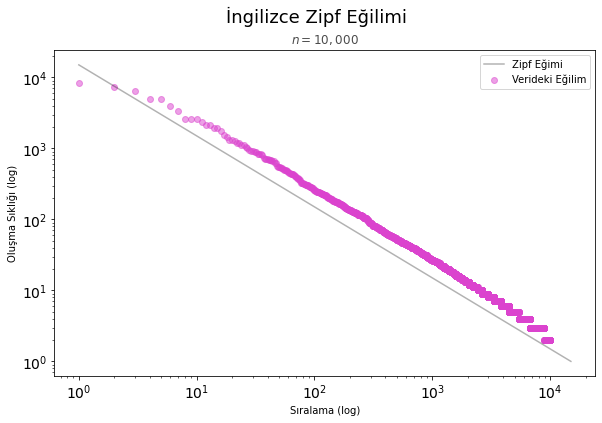

In [ ]:
fr = df_ingilizce['tekrar_sayisi']
indisler = np.argsort(-df_ingilizce['tekrar_sayisi'])
ingilizce_frekanslar = fr[indisler]

plt.figure(figsize=(9.7, 6))
plt.scatter(indisler, ingilizce_frekanslar, alpha=.5, label='Verideki Eğilim', color="#db43ce")
plt.plot([1,ingilizce_frekanslar[0]], [ingilizce_frekanslar[0],1], color='black', alpha=.3, label="Zipf Eğimi")
#plt.plot(x_ekseni, y_ekseni, color='black', alpha=.3, label="Zipf Eğimi")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sıralama (log)")
plt.ylabel('Oluşma Sıklığı (log)')
plt.suptitle("İngilizce Zipf Eğilimi", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

[bağlantı metni](https://)<center><h2>İngilizce, Zipf kuralına en çok uyan dil. Kelimelerin kullanım sıklığına baktığımızda Zipf kuralının öngördüğü şekilde bir orantı var.<h2/><center/>

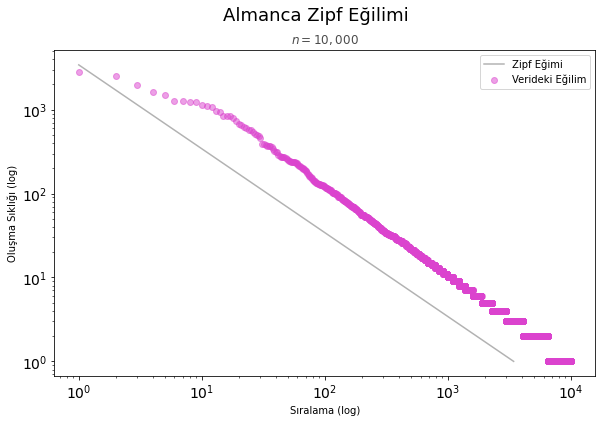

In [ ]:
fr = df_almanca['tekrar_sayisi']
indisler = np.argsort(-df_almanca['tekrar_sayisi'])
almanca_frekanslar = fr[indisler]

plt.figure(figsize=(9.7, 6))
plt.scatter(indisler, almanca_frekanslar, alpha=.5, label='Verideki Eğilim', color="#db43ce")
plt.plot([1,almanca_frekanslar[0]], [almanca_frekanslar[0],1], color='black', alpha=.3, label="Zipf Eğimi")
#plt.plot(x_ekseni, y_ekseni, color='black', alpha=.3, label="Zipf Eğimi")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sıralama (log)")
plt.ylabel('Oluşma Sıklığı (log)')
plt.suptitle("Almanca Zipf Eğilimi", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

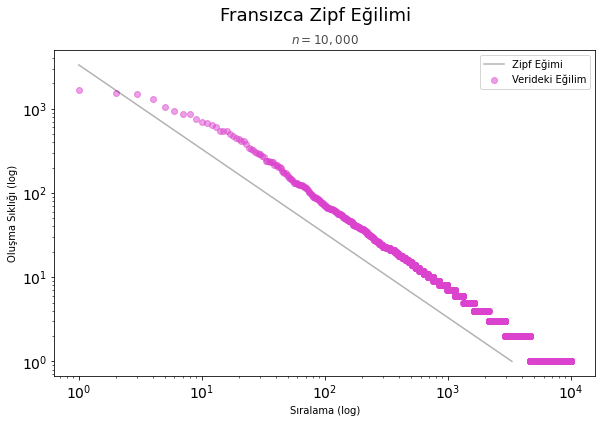

In [ ]:
fr = df_fransizca['tekrar_sayisi']
indisler = np.argsort(-df_fransizca['tekrar_sayisi'])
fransizca_frekanslar = fr[indisler]

plt.figure(figsize=(9.7, 6))
plt.scatter(indisler, fransizca_frekanslar, alpha=.5, label='Verideki Eğilim', color="#db43ce")
plt.plot([1,fransizca_frekanslar[0]], [fransizca_frekanslar[0],1], color='black', alpha=.3, label="Zipf Eğimi")
#plt.plot(x_ekseni, y_ekseni, color='black', alpha=.3, label="Zipf Eğimi")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sıralama (log)")
plt.ylabel('Oluşma Sıklığı (log)')
plt.suptitle("Fransızca Zipf Eğilimi", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

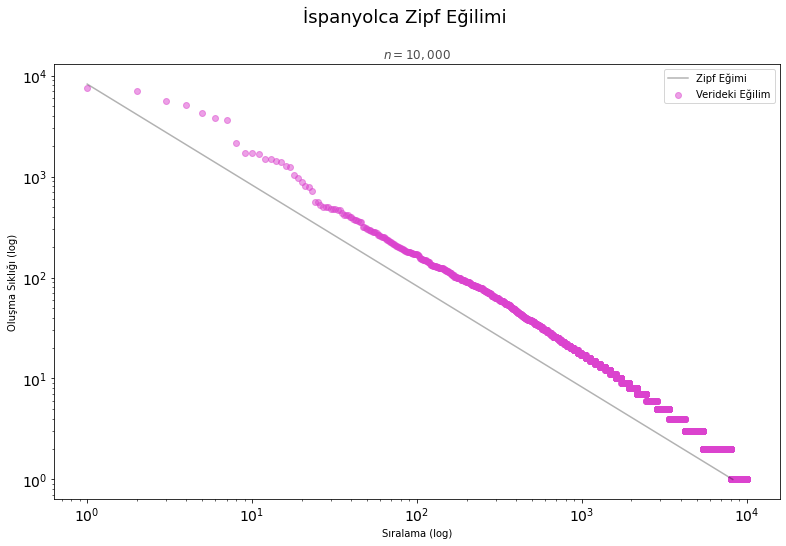

In [ ]:
fr = df_ispanyolca['tekrar_sayisi']
indisler = np.argsort(-df_ispanyolca['tekrar_sayisi'])
ispanyolca_frekanslar = fr[indisler]

plt.figure(figsize=(13, 8))
plt.scatter(indisler, ispanyolca_frekanslar, alpha=.5, label='Verideki Eğilim', color="#db43ce")
plt.plot([1,ispanyolca_frekanslar[0]], [ispanyolca_frekanslar[0],1], color='black', alpha=.3, label="Zipf Eğimi")
#plt.plot(x_ekseni, y_ekseni, color='black', alpha=.3, label="Zipf Eğimi")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sıralama (log)")
plt.ylabel('Oluşma Sıklığı (log)')
plt.suptitle("İspanyolca Zipf Eğilimi", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

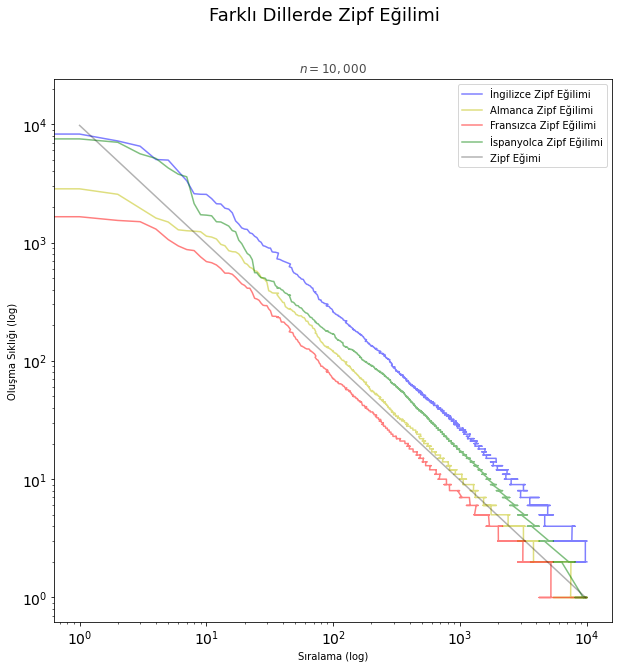

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(indisler, ingilizce_frekanslar, alpha=.5, label='İngilizce Zipf Eğilimi', color='b')
plt.plot(indisler, almanca_frekanslar, alpha=.5, label='Almanca Zipf Eğilimi', color='y')
plt.plot(indisler, fransizca_frekanslar, alpha=.5, label='Fransızca Zipf Eğilimi', color='r')
plt.plot(indisler, ispanyolca_frekanslar, alpha=.5, label='İspanyolca Zipf Eğilimi', color='g')
plt.plot([1,frekanslar[0]], [frekanslar[0],1], color='black', alpha=.3, label="Zipf Eğimi")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sıralama (log)")
plt.ylabel('Oluşma Sıklığı (log)')
plt.suptitle("Farklı Dillerde Zipf Eğilimi", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

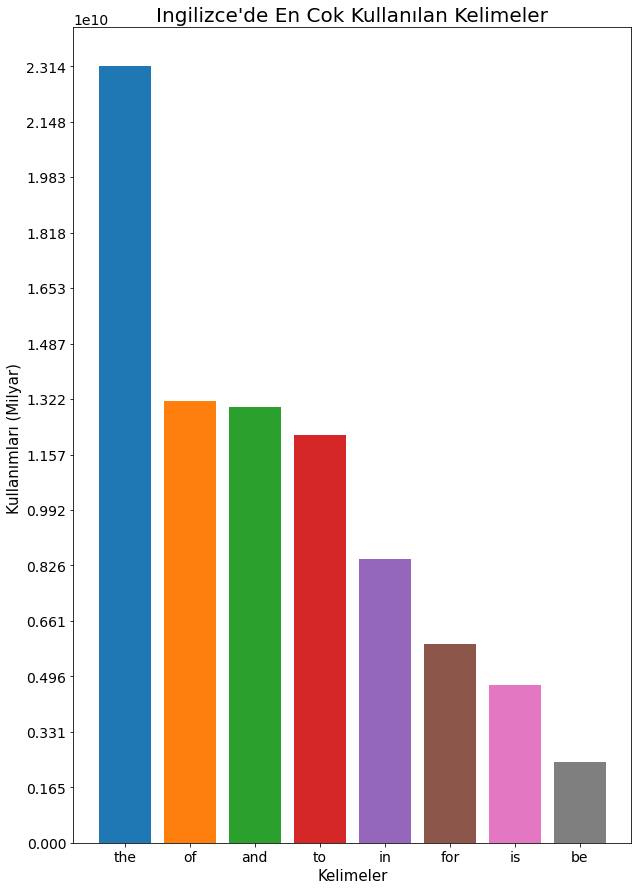

In [ ]:

data = pd.read_csv("https://raw.githubusercontent.com/yasntrk/climatechange/master/unigram_freq.csv")
plt.figure(figsize=(10,15))
plt.bar(data[(data['word'] == 'the')]['word'], 
         data[(data['word'] == 'the')]['count'], label = "the")
plt.bar(data[(data['word'] == 'of')]['word'], 
         data[(data['word'] == 'of')]['count'], label = "of")
plt.bar(data[(data['word'] == 'and')]['word'], 
         data[(data['word'] == 'and')]['count'], label = "and")
plt.bar(data[(data['word'] == 'to')]['word'], 
         data[(data['word'] == 'to')]['count'], label = "to")
plt.bar(data[(data['word'] == 'in')]['word'], 
         data[(data['word'] == 'in')]['count'], label = "in")
plt.bar(data[(data['word'] == 'for')]['word'], 
         data[(data['word'] == 'for')]['count'], label = "for")
plt.bar(data[(data['word'] == 'is')]['word'], 
         data[(data['word'] == 'is')]['count'], label = "is")
plt.bar(data[(data['word'] == 'be')]['word'], 
         data[(data['word'] == 'be')]['count'], label = "be")
plt.yticks(np.linspace(0,data[['count']].max(),15)//10*10)
plt.title("Ingilizce'de En Cok Kullanılan Kelimeler", fontsize = 20)
plt.xlabel('Kelimeler', fontsize=15)
plt.ylabel('Kullanımları (Milyar) ', fontsize=15)
plt.rc(['xtick','ytick'], labelsize=14)


<p>Burada en çok kullanılan kelimelere baktığımızda 1. Kelime "the" iken, ikinci kelime olan "of" kelimesi kendisinin yaklaşık yarısı kadar olması Zipf kanununu destekliyor fakat bundan sonra gelen kelimeler için sıra bozuluyor. Bunun sebebinin bağlaç olan kelimelerdeki tutarsızlık olabileceğini düşünüyoruz<p/>

kelimelerin herhangi bir kitapta kaç kez geçtiğinin istatistiki çalışmasını yaparsak da ortaya şöyle bir sonuç çıkıyor. kitaptaki her kelime kullanım sıklığı ile oranlı olarak diziliyor. yani ikinci sıradaki kelime birinci sıradakinin yarısı kadar kullanılmış oluyor. üçüncü sıradaki kelime birinci sıradakinin üçte biri kadar kullanılmış oluyor. dördüncü sıradaki kelime birinci sıradakinin bir bölü dördü kadar kullanılmış oluyor ve bu böyle devam ediyor.

buradan ortaya şu çıkıyor ki tüm kelimelerin en sık kullanılan %20lik kesimi günlük ihtiyacımızın %80'ini karşılıyor. bu oran başka alanlarda da çok sık rastlanan bir doğal eğilim. aynı oranı şehir yoğunluklarında, site trafik verilerinde, yemek tariflerinde kullanılan malzemelerde ve daha binerce veride buluyoruz.

bu öylesine sağlam bir kural ki şu an dünyadaki her dilde yazılmış her kitapta uygulanabildiği görülüyor. öyle ki henüz çevirisini yapamadığımız antik dillerde bile çalışıyor.

aslında bunun nedeni kesin olarak bilinmiyor ancak hakkında yazılan makalelerde çeşitli olasılıklara değinilmiş durumda. ben bunlardan en ilgimi çeken kısmına değineceğim burada. bu açıklamaya göre insan evrim sırasında özgür biçimde yaptığı seçimleri içgüdüsel olarak güvenli sağlam %20 lik kesimde odaklamanın doğal seçilimde yararını görmüş ve bu veriyi aktarmış.

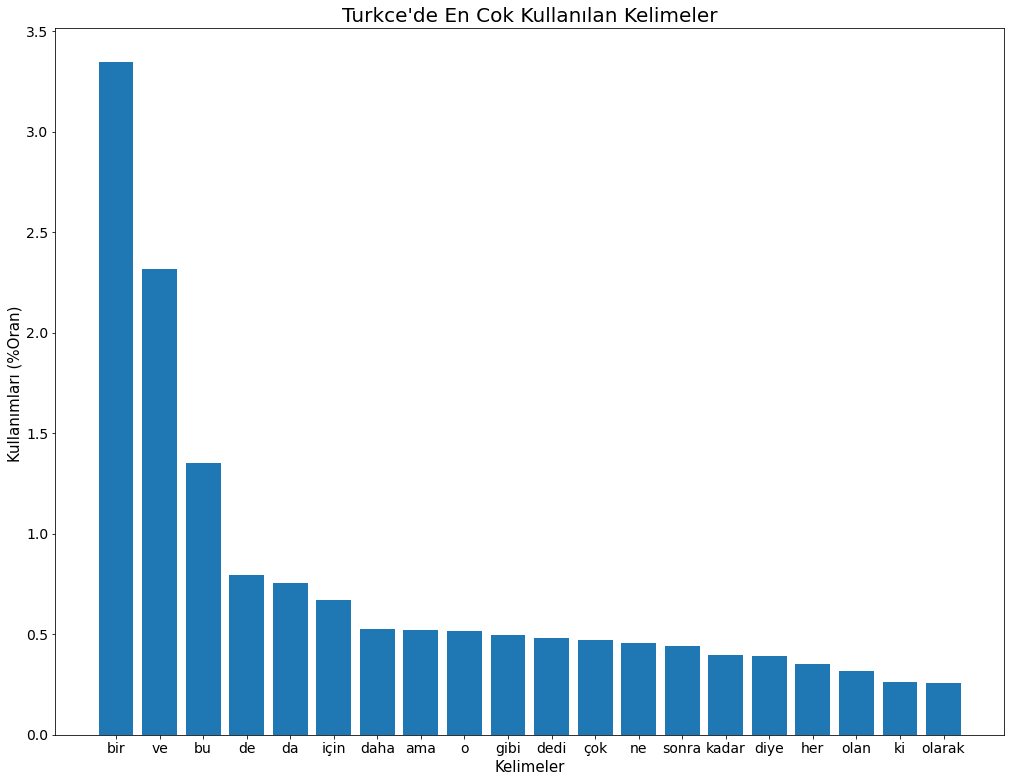

In [ ]:
kelimeler = ["bir","ve","bu","de","da","için","daha","ama","o","gibi","dedi","çok","ne","sonra","kadar","diye","her","olan","ki","olarak"]
degerler= [3.348,2.319,1.353,0.794,0.757,0.670,0.524,0.520,0.515,0.496,0.480,0.474,0.457,0.440,0.399,0.391,0.353,0.318,0.265,0.259]
#kaynak https://seyler.eksisozluk.com/kelimelerin-kullanim-sikligini-ongoren-ilginc-yasa-zipf-yasasi
plt.figure(figsize=(17,13))
plt.bar(kelimeler,degerler)
plt.title("Turkce'de En Cok Kullanılan Kelimeler", fontsize = 20)
plt.xlabel('Kelimeler', fontsize=15)
plt.ylabel('Kullanımları (%Oran) ', fontsize=15)
plt.rc(['xtick','ytick'], labelsize=14)


<center><h2> Türkçe'de kelimeleri aldık, ve bunların oranını daha iyi görebilmek için bar grafiği kullandık. "Bir" kelimesi, "ve" kelimesinin 2 katına yaklaşık, "bu" kelimesinin 3 katına yaklaşık şekilde diğer kelimelere oranla Zipf yasasına uygun bir şekilde ilerliyor. <h2/><center/>

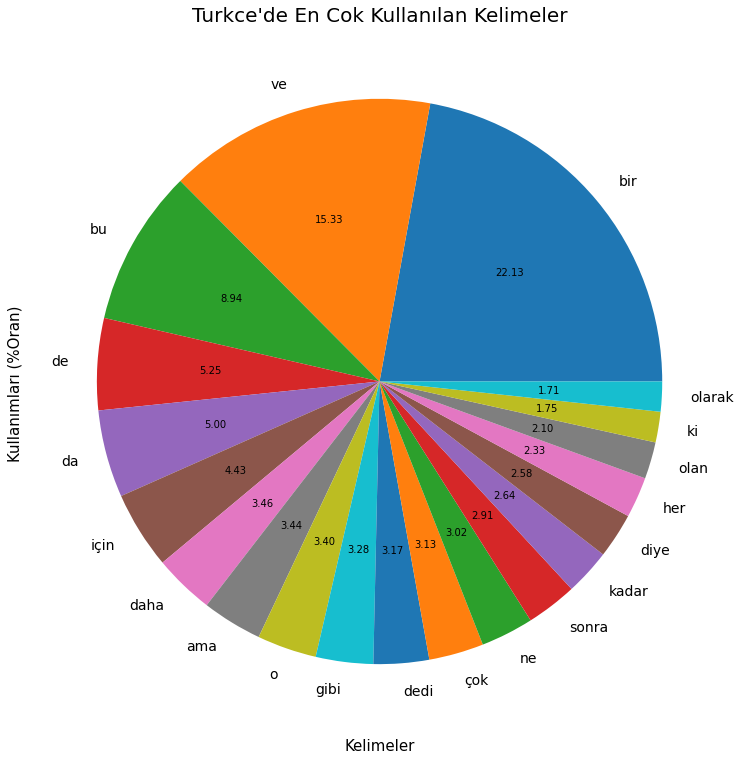

In [ ]:
kelimeler = ["bir","ve","bu","de","da","için","daha","ama","o","gibi","dedi","çok","ne","sonra","kadar","diye","her","olan","ki","olarak"]
degerler= [3.348,2.319,1.353,0.794,0.757,0.670,0.524,0.520,0.515,0.496,0.480,0.474,0.457,0.440,0.399,0.391,0.353,0.318,0.265,0.259]
plt.figure(figsize=(13,13))
plt.pie(degerler,labels=kelimeler,autopct='%1.2f')
plt.title("Turkce'de En Cok Kullanılan Kelimeler", fontsize = 20)
plt.xlabel('Kelimeler', fontsize=15)
plt.ylabel('Kullanımları (%Oran) ', fontsize=15)
plt.rc(['xtick','ytick'], labelsize=14)

<h2>><center> Türkçe'de her 360 kelime başına düşen kelime sayısı ektedir. Yine bu sayı da Zipf kanununa uymaktadır <h2/><center/>

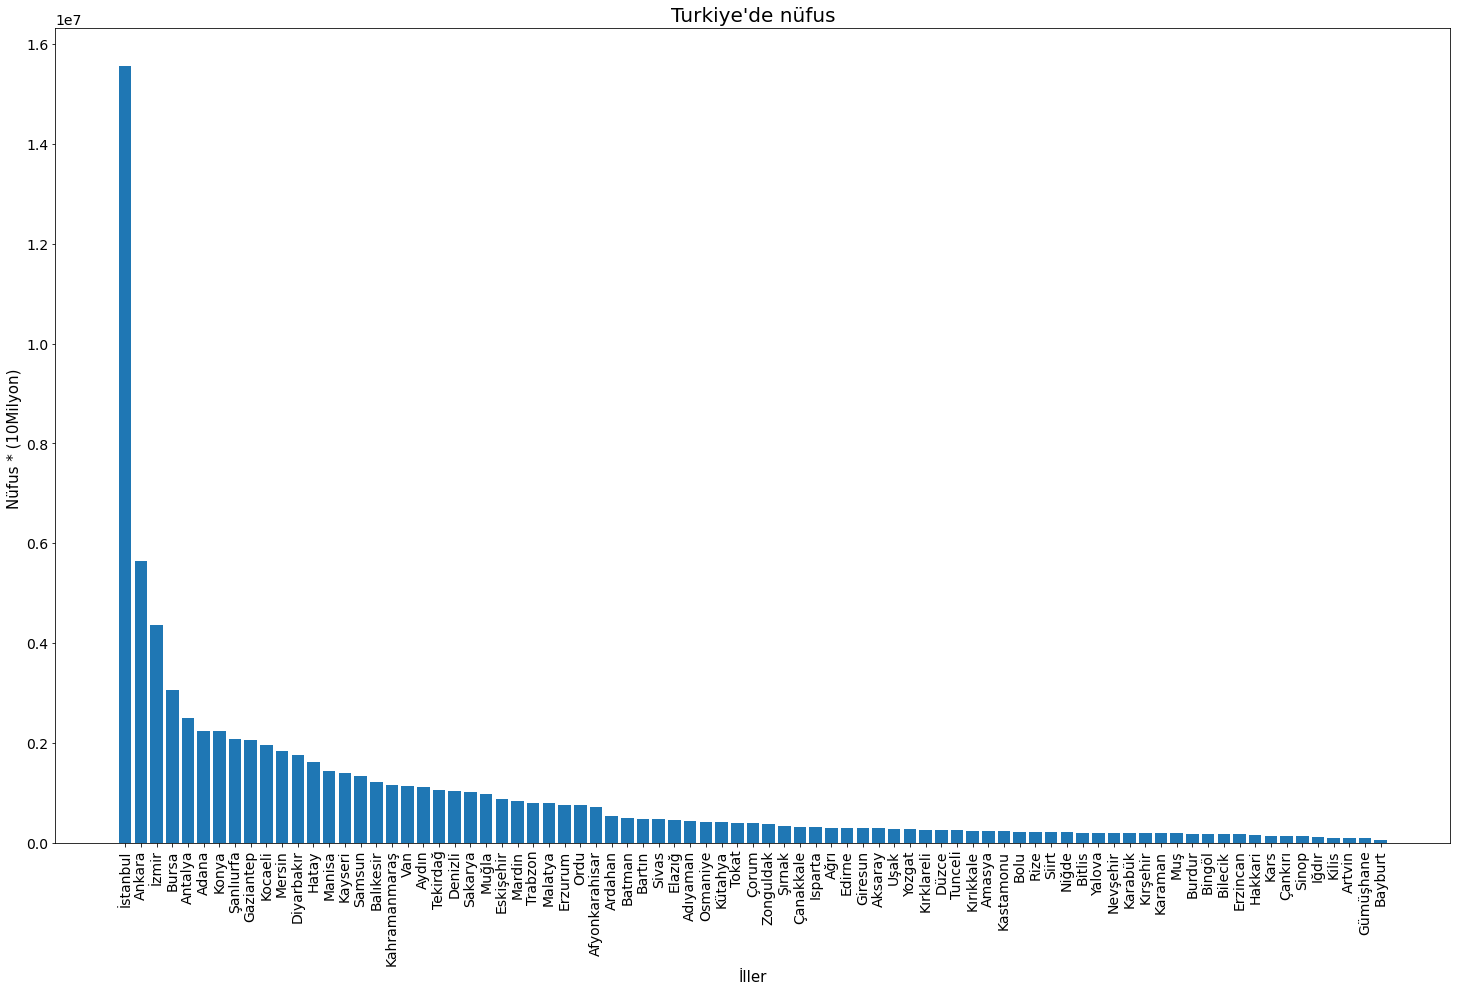

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/yasntrk/climatechange/master/ilnufusu.csv")
data = data.sort_values("nüfus",ascending="false")
data = data.iloc[::-1]
plt.figure(figsize=(25,15))
plt.xticks(rotation=90)
plt.bar(data["il"],data["nüfus"])
plt.title("Turkiye'de nüfus", fontsize = 20)
plt.xlabel('İller', fontsize=15)
plt.ylabel('Nüfus * (10Milyon) ', fontsize=15)
plt.rc(['xtick','ytick'], labelsize=14)


<center><h1> Türkiye'nin illere göre nüfus haritasını aldık <h1/><center/>

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/yasntrk/climatechange/master/ilnufusu.csv")
data = data.sort_values("nüfus")
data = data.iloc[::-1]
data = data.reset_index()
sayac = 1
del data['index']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


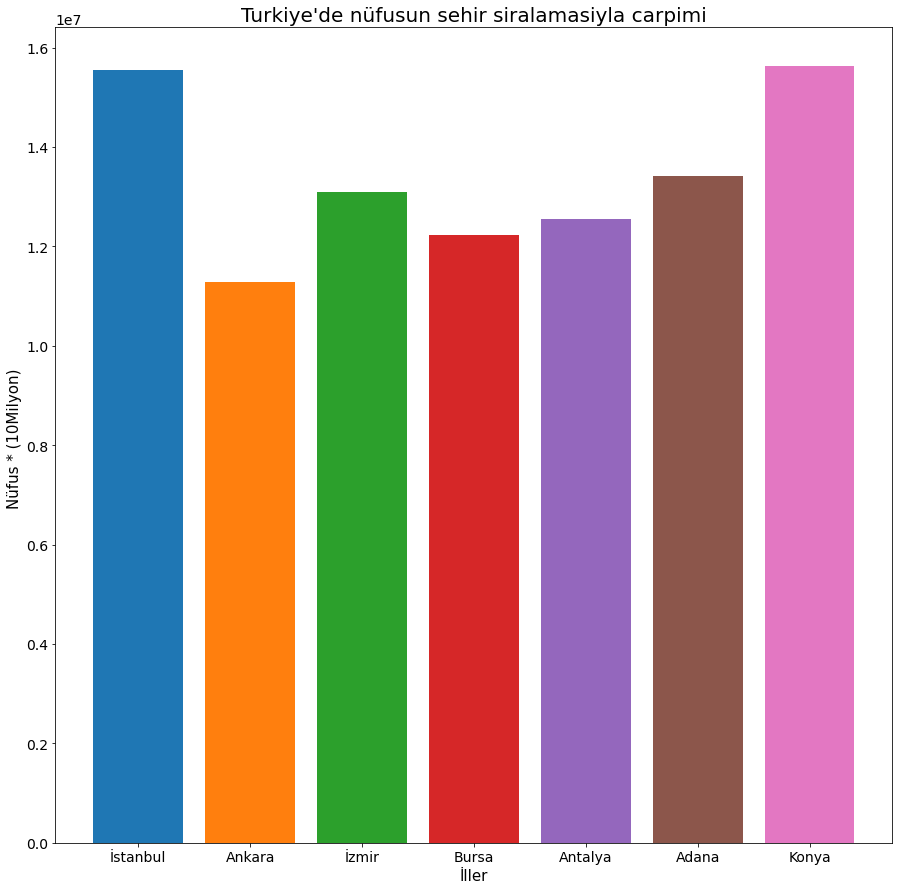

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/yasntrk/climatechange/master/ilnufusu.csv")
data = data.sort_values("nüfus")
data = data.iloc[::-1]
data = data.reset_index()
sayac = 1
del data['index']
hesap = []
for i in range(81):
  data['nüfus'][i] = data['nüfus'][i]*(i+1)
plt.figure(figsize=(15,15))
plt.bar(data[(data['il'] == 'İstanbul')]['il'], 
         data[(data['il'] == 'İstanbul')]['nüfus'], label = "İstanbul")
plt.bar(data[(data['il'] == 'Ankara')]['il'], 
         data[(data['il'] == 'Ankara')]['nüfus'], label = "Ankara")
plt.bar(data[(data['il'] == 'İzmir')]['il'], 
         data[(data['il'] == 'İzmir')]['nüfus'], label = "İzmir")
plt.bar(data[(data['il'] == 'Bursa')]['il'], 
         data[(data['il'] == 'Bursa')]['nüfus'], label = "Bursa")
plt.bar(data[(data['il'] == 'Antalya')]['il'], 
         data[(data['il'] == 'Antalya')]['nüfus'], label = "Antalya")
plt.bar(data[(data['il'] == 'Adana')]['il'], 
         data[(data['il'] == 'Adana')]['nüfus'], label = "Adana")
plt.bar(data[(data['il'] == 'Konya')]['il'], 
         data[(data['il'] == 'Konya')]['nüfus'], label = "Konya")
plt.title("Turkiye'de nüfusun sehir siralamasiyla carpimi", fontsize = 20)
plt.xlabel('İller', fontsize=15)
plt.ylabel('Nüfus x (10Milyon) ', fontsize=15)
plt.rc(['xtick','ytick'], labelsize=14)

<h1>Türkiye'deki şehirlerin nüfusa göre sıralaması yapıldıktan sonra, nüfusları bulundukları sırayla çarpılır ve birbirlerine çok yakın sonuçlar elde edilir. Zipf kanunun kurallarından bir tanesi de budur. Göç planlamaları ve diğer nüfus politikaları bu tarz tablolar üstünden yorumlanabilir.<h1/>

#Twitter'dan Çekilen Verinin Analizi








![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ4XIjIKFX_Hj7Fl2leLPzmQpBJG2Yecp40F_44euI1mQCeLxct&usqp=CAU)<br>
<center><h2> Twitterdan nasıl veri çektik?<h2/><center/>
<h2><center>
NodeXL yardımıyla twitter üstünden gündem kelimelerine ulaşıp bunlar üstünden tweetler elde ettik. Daha sonra bu tweetleri gerekli kütüphaneler kullanarak ve uygun işlemler yaparak bir veri seti haline getirdik. Emojilerden, bahsetmelerden ve bir takım etiketlemerden kurtulduk sonrasında da işledik. <h2/><center/>


In [ ]:
from google.colab import files
import io
dosya = files.upload()
df = pd.read_excel(io.BytesIO(dosya['bir.xlsx']))

Saving bir.xlsx to bir (3).xlsx


In [ ]:
import re
df = df.rename(columns={'Unnamed: 16': 'Tweetler'})
tweetler = ''
for cumle in df['Tweetler']:
  for kelime in cumle:
    if kelime != 'RT' or kelime != 'bir':
      if kelime.startswith('@') or kelime.startswith('https'):
        pass
      else:
        tweetler+=kelime
tweetler

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
tweetler = deEmojify(tweetler)
tablo = zipf_tablo_olustur(tweetler, 30)
df_tweetler = pd.DataFrame(tablo)

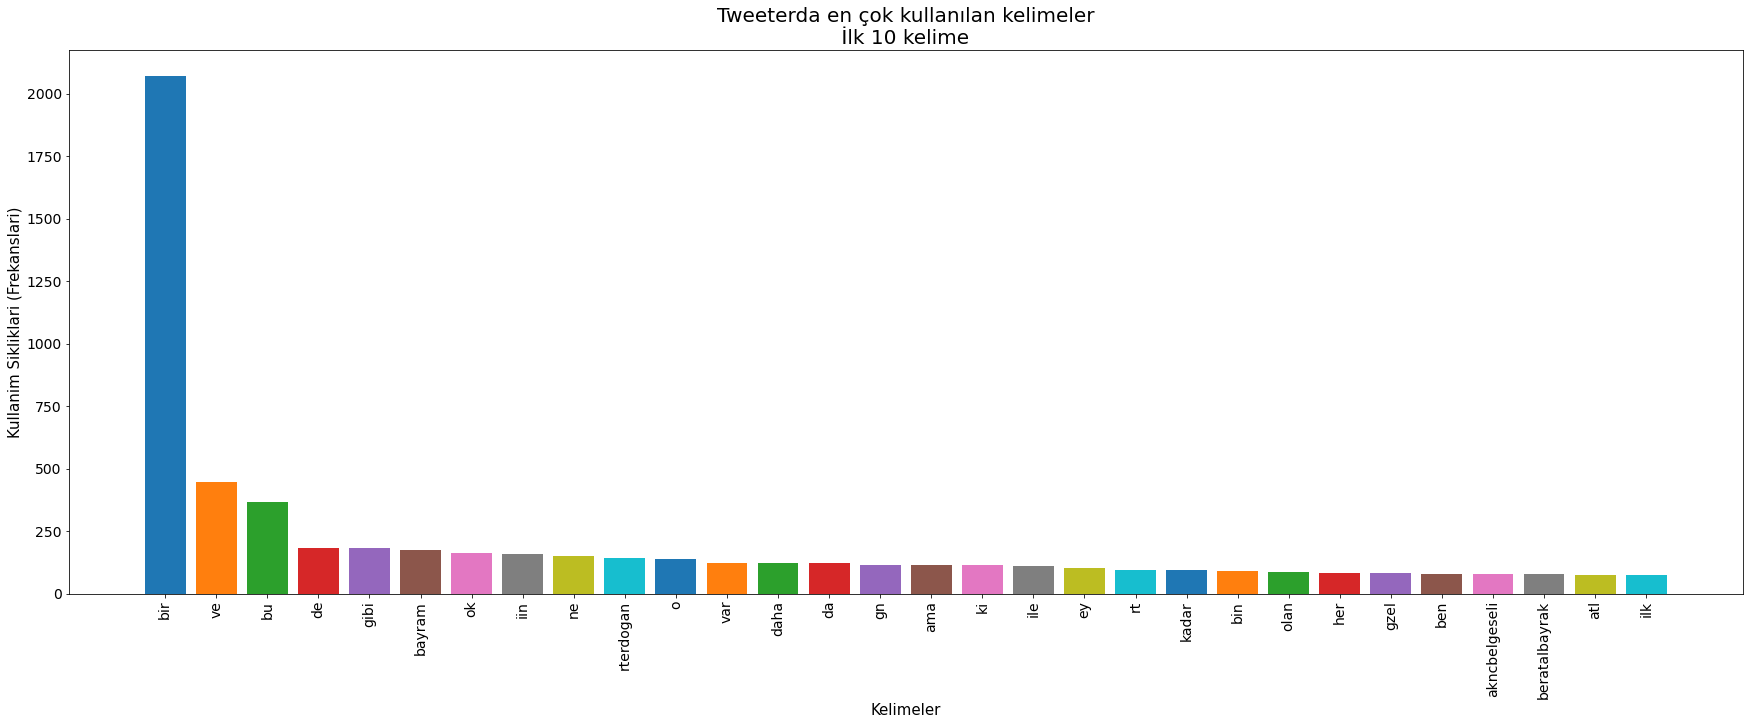

In [ ]:
plt.figure(figsize=(30,10))
kelime_sayisi = 10
for index, item in enumerate(tablo, start=1):
  plt.bar(item["kelime"],item["tekrar_sayisi"])
plt.title("Tweeterda en çok kullanılan kelimeler\n" + " İlk " + str(kelime_sayisi) + " kelime ", fontsize = 20)
plt.xlabel('Kelimeler', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Kullanim Sikliklari (Frekanslari)', fontsize=15)
plt.rc(['xtick','ytick'], labelsize=14)

<center><h1>Twitter'da yaptığımız araştırmada 'bir' kelimesi çerçevesinde tweetler aldık. Aldığımız tweetlerde en çok kullanılan kelime 've' sonrasında 'bu' kelimesi oldu. Siyasi içerikler de karşımıza çıktı. Neden twitter? Sorusuna verebileceğimiz cevap ise; Twitter insanların duygu yorum ve düşüncelerini en iyi şekilde belirtebildiği açık bir platform. Bu bize güzel bir toplum örneği oldu.<h1/><center/>


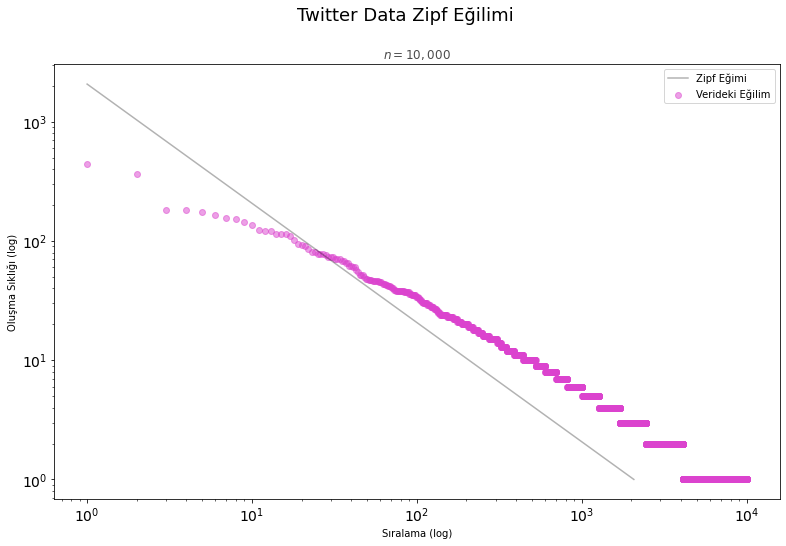

In [ ]:
tablo = zipf_tablo_olustur(tweetler,10000)
df_tweetler = pd.DataFrame(tablo)
fr = df_tweetler['tekrar_sayisi']
indisler = np.argsort(-df_tweetler['tekrar_sayisi'])
tweet_frekanslar = fr[indisler]

plt.figure(figsize=(13, 8))
plt.scatter(indisler, tweet_frekanslar, alpha=.5, label='Verideki Eğilim', color="#db43ce")
plt.plot([1,tweet_frekanslar[0]], [tweet_frekanslar[0],1], color='black', alpha=.3, label="Zipf Eğimi")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sıralama (log)")
plt.ylabel('Oluşma Sıklığı (log)')
plt.suptitle("Twitter Data Zipf Eğilimi", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

fr = df_ispanyolca['tekrar_sayisi']
indisler = np.argsort(-df_ispanyolca['tekrar_sayisi'])
ispanyolca_frekanslar = fr[indisler]
w = df_ispanyolca['kelime']
ispanyolca_kelimeler = w[indisler]

trace0 = go.Scatter(
  x = indisler, 
  y = ispanyolca_frekanslar,
  fill= None,
  mode='text',
  text=ispanyolca_kelimeler,
  name='Kelimeler',
  line=dict(
      color='rgb(0, 255, 255)',
  )
)
data = [trace0]
layout = go.Layout(
  xaxis=dict(title='Kelime Sıralaması', type='log'),
  yaxis=dict(title='Kelime Frekansları', type='log'),
  title='Kelimelerin Dağılımları', showlegend = False)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)